### 1958-2014 trends for CMIP5 vs 3 Reanalysis products 
* concatenate historical with rcp85 for all co-existing models
* compute trends 1958-2014

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from glob import glob

from tqdm import tqdm

from ingridlib.openurl import mfurl
from ingridlib.trend import trend

In [2]:
# lets get started using the 1x1 degree 40 models that Haibo has on kage:
# if no access to /net/kage/f1, can also get at 
#     http://kage.ldeo.columbia.edu:81/SOURCES/.LDEO/.ClimateGroup/.PROJECTS/.IPCC/.CMIP5/.m40mmm_1x1/
var = 'ts'
recompute = False

scenario ='historical'
path = '/net/kage/f1/haibo/CMIP5/output/' + scenario + '/atmos/mon/' + var + '/'
files = glob(path + '*/r1i1p1/*.nc')
models1=[]
for file in files:
    models1 += [file.split("/")[-3]]
    
scenario ='rcp85'
path = '/net/kage/f1/haibo/CMIP5/output/' + scenario + '/atmos/mon/' + var + '/'
files = glob(path + '*/r1i1p1/*.nc')
models2=[]
for file in files:
    models2 += [file.split("/")[-3]]
    
# only consider the models which are in common

models = sorted(list(set(models1) & set(models2)))

print(models)
# let open_mfdataset (or the mfurl version) to do the T concatenation, model by model
path = '/net/kage/f1/haibo/CMIP5/output/*/atmos/mon/' + var + '/'
ds = []
for model in models:
    files = glob(path + model + '/r1i1p1/*.nc')
    dss = mfurl(files)
    ds += [dss]

['ACCESS1-0', 'ACCESS1-3', 'BNU-ESM', 'CCSM4', 'CESM1-BGC', 'CESM1-CAM5', 'CESM1-CAM5-1-FV2', 'CMCC-CESM', 'CMCC-CM', 'CMCC-CMS', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-g2', 'FGOALS-s2', 'FIO-ESM', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'GISS-E2-H', 'GISS-E2-H-CC', 'GISS-E2-R', 'GISS-E2-R-CC', 'HadGEM2-CC', 'HadGEM2-ES', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM', 'MIROC-ESM-CHEM', 'MIROC5', 'MPI-ESM-LR', 'MPI-ESM-MR', 'MRI-CGCM3', 'MRI-ESM1', 'NorESM1-M', 'NorESM1-ME', 'bcc-csm1-1', 'bcc-csm1-1-m', 'inmcm4']
1861-01-16T00:00:00.000000000 to 2099-12-16T00:00:00.000000000
1861-01-16T00:00:00.000000000 to 2099-12-16T00:00:00.000000000
1861-01-16T00:00:00.000000000 to 2099-12-16T00:00:00.000000000
1861-01-16T00:00:00.000000000 to 2099-12-16T00:00:00.000000000
1861-01-16T00:00:00.000000000 to 2099-12-16T00:00:00.000000000
1861-01-16T00:00:00.000000000 to 2099-12-16T00:00:00.000000000
1861-01-16T00:00:00.000000000 to 2099-12-16T00:00:00.000000000
1861-01-16T00:00:

In [3]:
file_out = 'ts-Ann-1958-2014.nc'
recompute = False
if recompute:
    #ds_clean(var,models,ds)
    ds1 = []
    for dss,model in zip(tqdm(ds),models):
        dss = dss.sel(time=slice('1958-01-01', '2015-01-01')).resample(time='AS').mean(dim='time').compute()
        dss['model_name'] = model
        ds1 += [dss]
    dsall = xr.concat(ds1,dim='model')
    dsall.to_netcdf(file_out,mode='w')
else:
    dsall = xr.open_dataset('ts-Ann-1958-2014.nc')

<xarray.DataArray 'model_name' ()>
array('CESM1-CAM5-1-FV2', dtype='<U16')

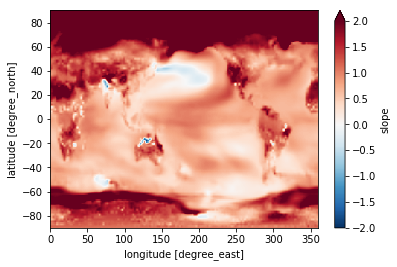

In [4]:
# test trend for one model:
nt = dsall.time.size
time = dsall.time.copy()
dsall['time'] = np.arange(nt)
dsm1 = dsall.ts[6]
ds_out = trend(dsm1)* nt
ds_out.slope.plot(cmap="RdBu_r",vmin=-2, vmax=2)
dsall['model_name'][6]

In [5]:
time

<xarray.DataArray 'time' (time: 57)>
array(['1958-01-01T00:00:00.000000000', '1959-01-01T00:00:00.000000000',
       '1960-01-01T00:00:00.000000000', '1961-01-01T00:00:00.000000000',
       '1962-01-01T00:00:00.000000000', '1963-01-01T00:00:00.000000000',
       '1964-01-01T00:00:00.000000000', '1965-01-01T00:00:00.000000000',
       '1966-01-01T00:00:00.000000000', '1967-01-01T00:00:00.000000000',
       '1968-01-01T00:00:00.000000000', '1969-01-01T00:00:00.000000000',
       '1970-01-01T00:00:00.000000000', '1971-01-01T00:00:00.000000000',
       '1972-01-01T00:00:00.000000000', '1973-01-01T00:00:00.000000000',
       '1974-01-01T00:00:00.000000000', '1975-01-01T00:00:00.000000000',
       '1976-01-01T00:00:00.000000000', '1977-01-01T00:00:00.000000000',
       '1978-01-01T00:00:00.000000000', '1979-01-01T00:00:00.000000000',
       '1980-01-01T00:00:00.000000000', '1981-01-01T00:00:00.000000000',
       '1982-01-01T00:00:00.000000000', '1983-01-01T00:00:00.000000000',
       '1984-0

In [6]:
ds_reorder = dsall.transpose('time','model','lat','lon')
ds_reorder

<xarray.Dataset>
Dimensions:     (lat: 180, lon: 360, model: 40, time: 57)
Coordinates:
  * time        (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * lon         (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 ...
  * lat         (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 ...
Dimensions without coordinates: model
Data variables:
    ts          (time, model, lat, lon) float32 ...
    model_name  (model) object ...

In [7]:
# find trends for all models:
trend_fac = nt    # to get total change over the whole time period

ds_trends = trend(ds_reorder.ts)*trend_fac
ds_trends.rename({'slope':'trend'},inplace=True)

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, model: 40)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 -84.5 -83.5 -82.5 ...
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5 ...
Dimensions without coordinates: model
Data variables:
    trend    (model, lat, lon) float64 0.4446 0.4453 0.4458 0.4462 0.4466 ...
    pval     (model, lat, lon) float64 4.986 4.972 4.963 4.959 4.953 4.946 ...
Attributes:
    units:    units / time

In [8]:
trend_nino34 = ds_trends.trend.sel(lon=slice(190,240),lat=slice(-5,5)).mean(['lon','lat']) 
trend_nino3 = ds_trends.trend.sel(lon=slice(210,270),lat=slice(-5,5)).mean(['lon','lat']) 

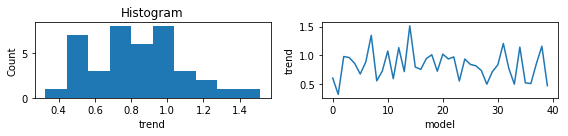

In [9]:
plt.figure(figsize=(8,2))
plt.subplot(121)
trend_nino34.plot.hist()
plt.subplot(122)
trend_nino34.plot()
plt.tight_layout()

In [10]:
# who are the extreme models? 
dst_cmip5 = trend_nino34.copy()

modmin = np.argmin(trend_nino34.values)
modmax = np.argmax(trend_nino34.values)
print(modmin,models[modmin],modmax,models[modmax])
print(trend_nino3[modmin].values,trend_nino34[modmax].values)
idx = 0
for model, trend in zip(models,trend_nino34.values):
    print(idx,model,trend)
    idx += 1

1 ACCESS1-3 14 FGOALS-s2
0.3354055791770296 1.5122596013863099
0 ACCESS1-0 0.6087362340917728
1 ACCESS1-3 0.32594251991610224
2 BNU-ESM 0.9810633635121615
3 CCSM4 0.963523584450407
4 CESM1-BGC 0.8603343166858692
5 CESM1-CAM5 0.6778748451571159
6 CESM1-CAM5-1-FV2 0.8834855840523255
7 CMCC-CESM 1.3471523193960704
8 CMCC-CM 0.5601666301858836
9 CMCC-CMS 0.7271250268344223
10 CNRM-CM5 1.0756464559620824
11 CSIRO-Mk3-6-0 0.5979295457360779
12 CanESM2 1.1333642765289456
13 FGOALS-g2 0.7202061088825094
14 FGOALS-s2 1.5122596013863099
15 FIO-ESM 0.7989452625894781
16 GFDL-CM3 0.7582577713839526
17 GFDL-ESM2G 0.943983459096824
18 GFDL-ESM2M 1.011356654951725
19 GISS-E2-H 0.7266048140502328
20 GISS-E2-H-CC 1.0223403048209958
21 GISS-E2-R 0.9387744100035118
22 GISS-E2-R-CC 0.974191976312346
23 HadGEM2-CC 0.557480664633765
24 HadGEM2-ES 0.937588576819509
25 IPSL-CM5A-LR 0.844953631396364
26 IPSL-CM5A-MR 0.8205279668798588
27 IPSL-CM5B-LR 0.7398258517410955
28 MIROC-ESM 0.5020716763952096
29 MIROC-

In [11]:
ds_20CR = xr.open_dataset('/net/carney/home/naomi/TCC/INC/data/ts-20CR-trend2014.nc')
ds_ORA = xr.open_dataset('/net/carney/home/naomi/TCC/INC/data/ts-ORA-trend2014.nc')
ds_JMA = xr.open_dataset('/net/carney/home/naomi/TCC/INC/data/ts-JMA-trend2013.nc')
ds_coupled = xr.open_dataset('/net/carney/home/naomi/TCC/INC/keep/ts-tauclim2f-INC2-trend.nc')
ds_ra = xr.concat([ds_20CR,ds_ORA,ds_JMA,ds_coupled],dim='model')
dst_ra = ds_ra.ts.sel(X=slice(190,240),Y=slice(-5,5)).mean(['X','Y'])  # nino3.4
#dst_ra = ds_ra.ts.sel(X=slice(210,270),Y=slice(-5,5)).mean(['X','Y'])  # nino3

In [12]:
dst_ra.to_netcdf('dst_ra.nc')
dst_cmip5.to_netcdf('dst_cmip5.nc')

/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")
/home2/nhn2/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")


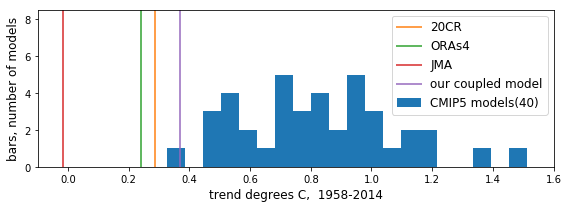

In [13]:
#from matplotlib import rcParams
#rcParams['font.family'] = 'serif'
plt.figure(figsize=(8,3))
           
dst_cmip5.plot.hist(label='CMIP5 models(40)',bins=20)
#dst_ra.plot.hist(label='reanalyses(3)')
plt.plot((dst_ra[0], dst_ra[0]), (0.0, 9), '-', linewidth=2.0, alpha=0.75, label='20CR')
plt.plot((dst_ra[1], dst_ra[1]), (0.0, 9), '-', linewidth=2.0, alpha=0.75, label='ORAs4')
plt.plot((dst_ra[2], dst_ra[2]), (0.0, 9), '-', linewidth=2.0, alpha=0.75, label='JMA')
plt.plot((dst_ra[3], dst_ra[3]), (0.0, 9), '-', linewidth=2.0, alpha=0.75, label='our coupled model')

#dst_cmip5[0:2].plot.hist(label='ACCESS1 models')
#plt.title(r'Annual mean trends in Niño3.4 region')
plt.title('')
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('bars, number of models', fontsize=12)
plt.xlabel('trend degrees C,  1958-2014', fontsize=12)
plt.axis([-.1, 1.6, 0.0, 8.5])
plt.tight_layout()
plt.savefig('hist.eps')

In [14]:
dst_cmip5[0:2]

<xarray.DataArray 'trend' (model: 2)>
array([0.608736, 0.325943])
Dimensions without coordinates: model

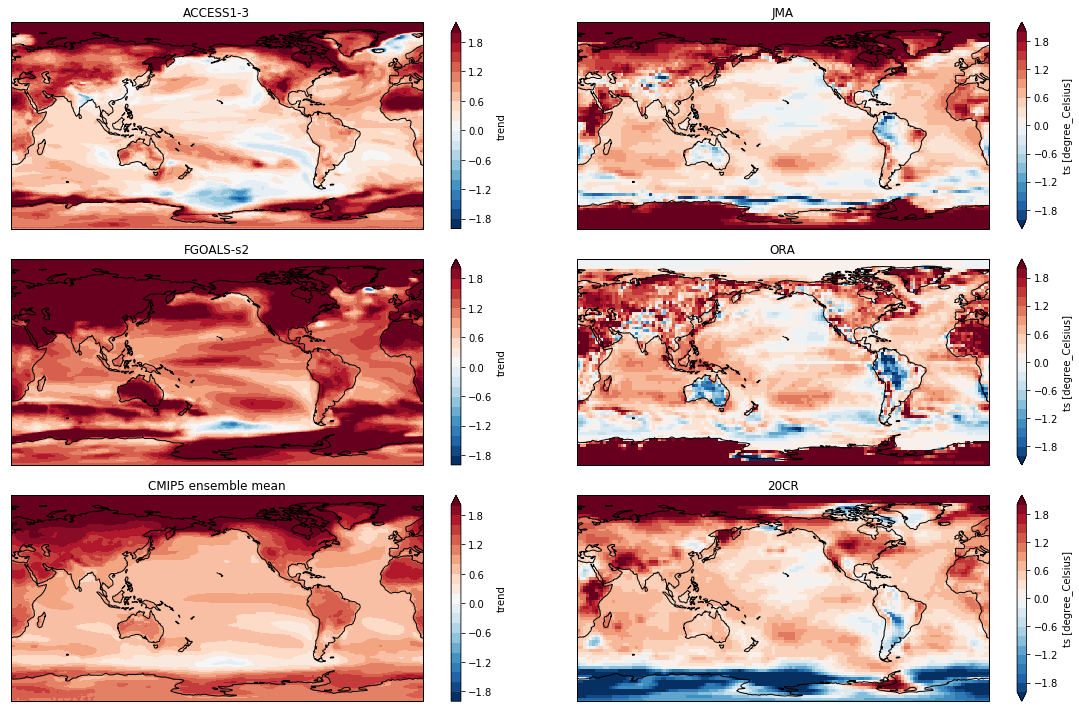

In [15]:
import cartopy.crs as ccrs


plt.figure(figsize=(16,10))
proj = ccrs.PlateCarree(central_longitude=200)
trans = ccrs.PlateCarree()

ax = plt.subplot(321,projection=proj)
ds_trends.trend[modmin].plot(transform=trans,cmap="RdBu_r",levels=21,vmin=-2,vmax=2)
plt.title(models[modmin])
ax.coastlines()
ax = plt.subplot(323,projection=proj)
#ds_trends.trend[24].sel(lon=slice(120,290),lat=slice(-30,30)).plot(transform=trans,cmap="RdBu_r",levels=21,vmin=-2,vmax=2)
ds_trends.trend[modmax].plot(transform=trans,cmap="RdBu_r",levels=21,vmin=-2,vmax=2)
plt.title(models[modmax])
ax.coastlines()
ax = plt.subplot(325,projection=proj)
ds_trends.trend.mean('model').plot(transform=trans,cmap="RdBu_r",levels=21,vmin=-2,vmax=2)
plt.title('CMIP5 ensemble mean')
ax.coastlines()

ax = plt.subplot(322,projection=proj)
ds_JMA.ts.plot(transform=trans,cmap="RdBu_r",levels=21,vmin=-2,vmax=2)
plt.title("JMA")
ax.coastlines()
ax = plt.subplot(324,projection=proj)
ds_ORA.ts.plot(transform=trans,cmap="RdBu_r",levels=21,vmin=-2,vmax=2)
plt.title("ORA")
ax.coastlines()
ax = plt.subplot(326,projection=proj)
ds_20CR.ts.plot(transform=trans,cmap="RdBu_r",levels=21,vmin=-2,vmax=2)
plt.title("20CR")
ax.coastlines()
plt.tight_layout()

plt.savefig('trends.eps')

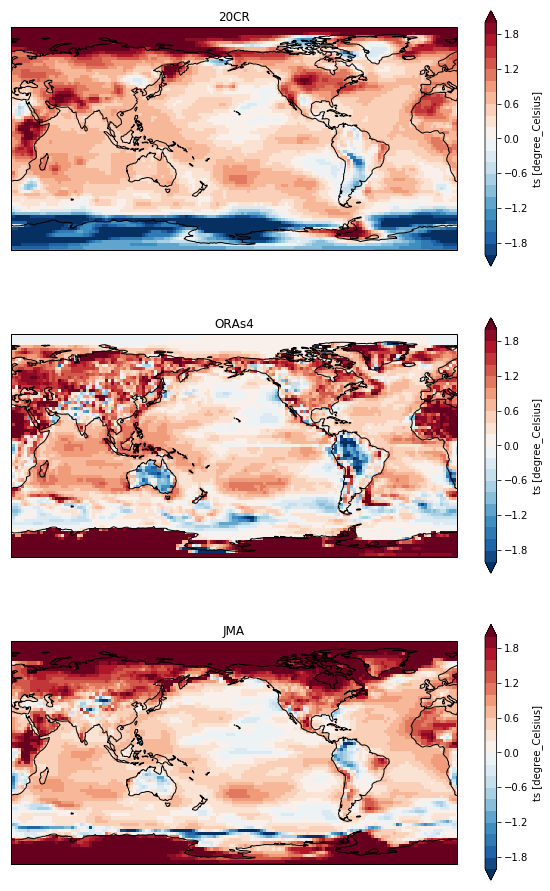

In [16]:
import cartopy.crs as ccrs

plt.figure(figsize=(10,16))

proj = ccrs.PlateCarree(central_longitude=200)
trans = ccrs.PlateCarree()

ax = plt.subplot(311,projection=proj)
ds_20CR.ts.plot(transform=trans,cmap="RdBu_r",levels=21,vmin=-2,vmax=2)
plt.title('20CR')
ax.coastlines()
ax = plt.subplot(312,projection=proj)
ds_ORA.ts.plot(transform=trans,cmap="RdBu_r",levels=21,vmin=-2,vmax=2)
plt.title('ORAs4')
ax.coastlines()
ax = plt.subplot(313,projection=proj)
ds_JMA.ts.plot(transform=trans,cmap="RdBu_r",levels=21,vmin=-2,vmax=2)
plt.title('JMA')
ax.coastlines()



plt.savefig('reanalyses-trends.eps')

In [27]:
proj = ccrs.PlateCarree(central_longitude=200)
trans = ccrs.PlateCarree()

plt.figure(figsize=(16,10))
for idx in range(0,9):   
    model = models[idx]
    print(idx,model)
    ax = plt.subplot(331+idx,projection=proj)
    ds_trends.trend[idx].plot(transform=trans,cmap="RdBu_r",levels=21,vmin=-2,vmax=2)
    plt.title(model)
    ax.coastlines()
plt.savefig('model1.eps')
plt.figure(figsize=(16,10))
for idx in range(10,19):   
    model = models[idx]
    print(idx,model)
    ax = plt.subplot(321+idx,projection=proj)
    ds_trends.trend[idx].plot(transform=trans,cmap="RdBu_r",levels=21,vmin=-2,vmax=2)
    plt.title(model)
    ax.coastlines()
plt.savefig('model2.eps')

20 GISS-E2-H-CC
21 GISS-E2-R
22 GISS-E2-R-CC
23 HadGEM2-CC
24 HadGEM2-ES
25 IPSL-CM5A-LR
26 IPSL-CM5A-MR
27 IPSL-CM5B-LR
28 MIROC-ESM


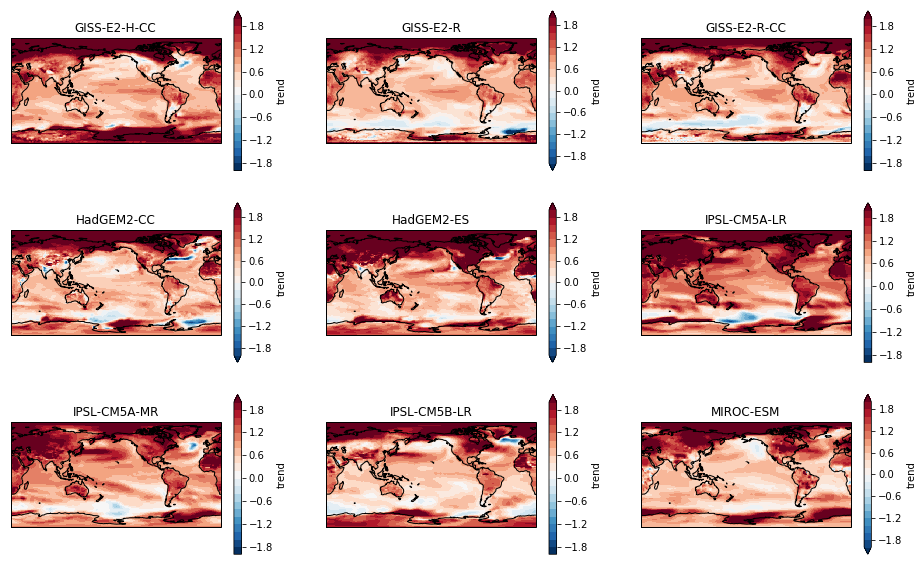

In [35]:
plt.figure(figsize=(16,10))
for idx in range(20,29):   
    model = models[idx]
    print(idx,model)
    ax = plt.subplot(311+idx,projection=proj)
    ds_trends.trend[idx].plot(transform=trans,cmap="RdBu_r",levels=21,vmin=-2,vmax=2)
    plt.title(model)
    ax.coastlines()
plt.savefig('model3.eps')

30 MIROC5
31 MPI-ESM-LR
32 MPI-ESM-MR
33 MRI-CGCM3
34 MRI-ESM1
35 NorESM1-M
36 NorESM1-ME
37 bcc-csm1-1
38 bcc-csm1-1-m


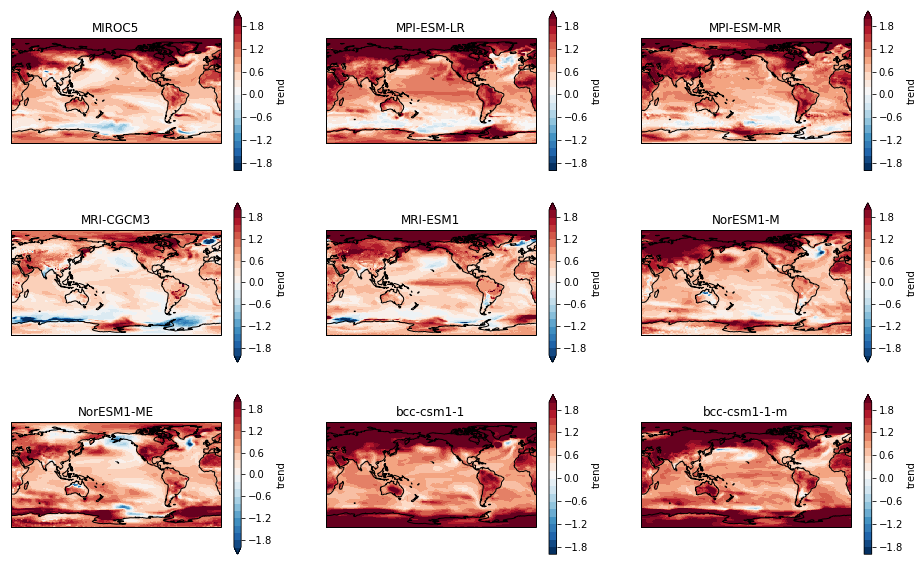

In [36]:
plt.figure(figsize=(16,10))
for idx in range(30,39):   
    model = models[idx]
    print(idx,model)
    ax = plt.subplot(301+idx,projection=proj)
    ds_trends.trend[idx].plot(transform=trans,cmap="RdBu_r",levels=21,vmin=-2,vmax=2)
    plt.title(model)
    ax.coastlines()
plt.savefig('model4.eps')

9 CMCC-CMS
19 GISS-E2-H
29 MIROC-ESM-CHEM
39 inmcm4


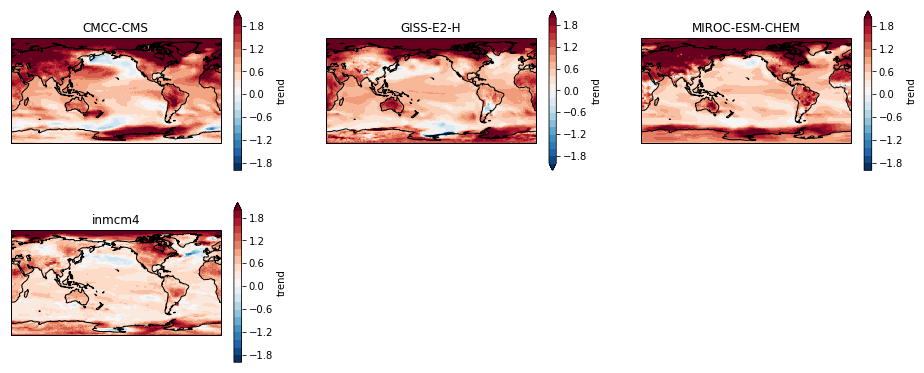

In [37]:
plt.figure(figsize=(16,10))
for id,idx in enumerate([9,19,29,39]):   
    model = models[idx]
    print(idx,model)
    ax = plt.subplot(331+id,projection=proj)
    ds_trends.trend[idx].plot(transform=trans,cmap="RdBu_r",levels=21,vmin=-2,vmax=2)
    plt.title(model)
    ax.coastlines()
plt.savefig('model5.eps')